### UNEMPLOYMENT ANALYSIS WITH PYTHON

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Load the dataset
data_path = r"C:\Users\srira\Downloads\Optifyx Technology Internship\Unemployment in India.csv"
data = pd.read_csv(data_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
# Renaming columns to remove leading and trailing spaces
data.columns = data.columns.str.strip()

In [11]:
# Average, Highest, and Lowest Estimated Unemployment Rate
avg_unemployment = data['Estimated Unemployment Rate (%)'].mean()
highest_unemployment = data['Estimated Unemployment Rate (%)'].max()
lowest_unemployment = data['Estimated Unemployment Rate (%)'].min()
print(f"Average Unemployment Rate: {avg_unemployment:.2f}%")
print(f"Highest Unemployment Rate: {highest_unemployment:.2f}%")
print(f"Lowest Unemployment Rate: {lowest_unemployment:.2f}%")

Average Unemployment Rate: 11.79%
Highest Unemployment Rate: 76.74%
Lowest Unemployment Rate: 0.00%


### Data Exploration and Visualization

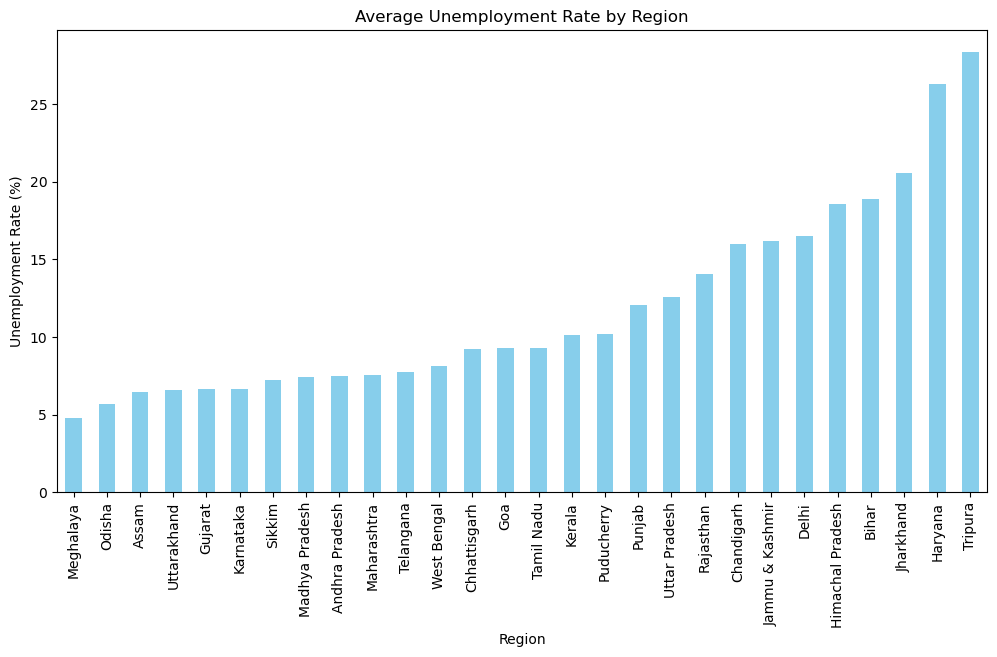

In [12]:
# Average Unemployment Rate by Region
avg_unemployment_by_region = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()
avg_unemployment_by_region.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Unemployment Rate by Region')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Region')
plt.show()

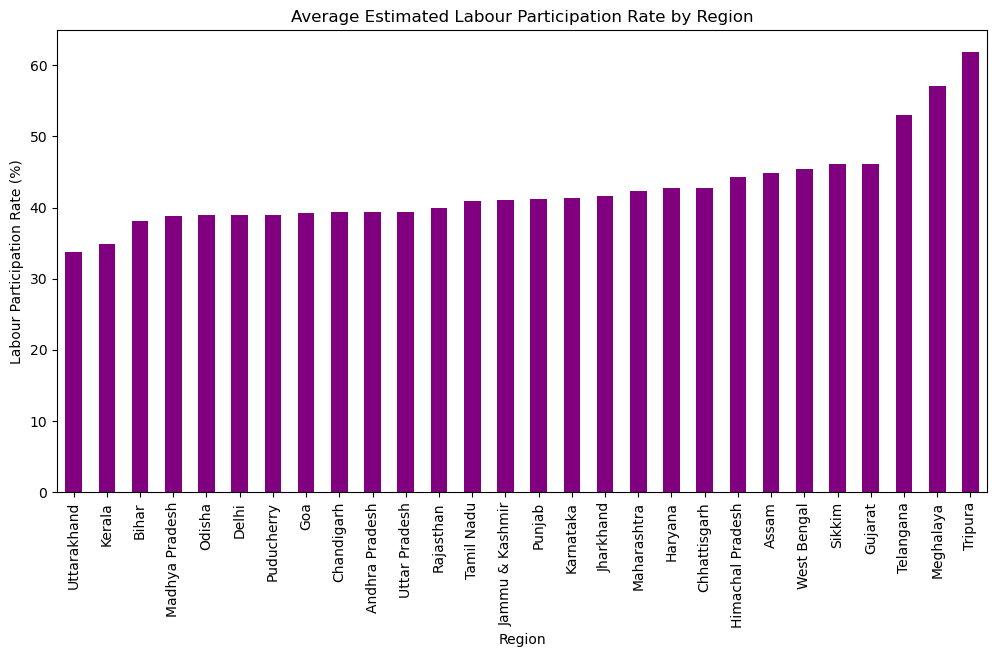

In [14]:
# Bar Plot for Average Estimated Labour Participation Rate (%) by Region
avg_labour_rate_by_region = data.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().sort_values()
avg_labour_rate_by_region.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Average Estimated Labour Participation Rate by Region')
plt.ylabel('Labour Participation Rate (%)')
plt.xlabel('Region')
plt.show()

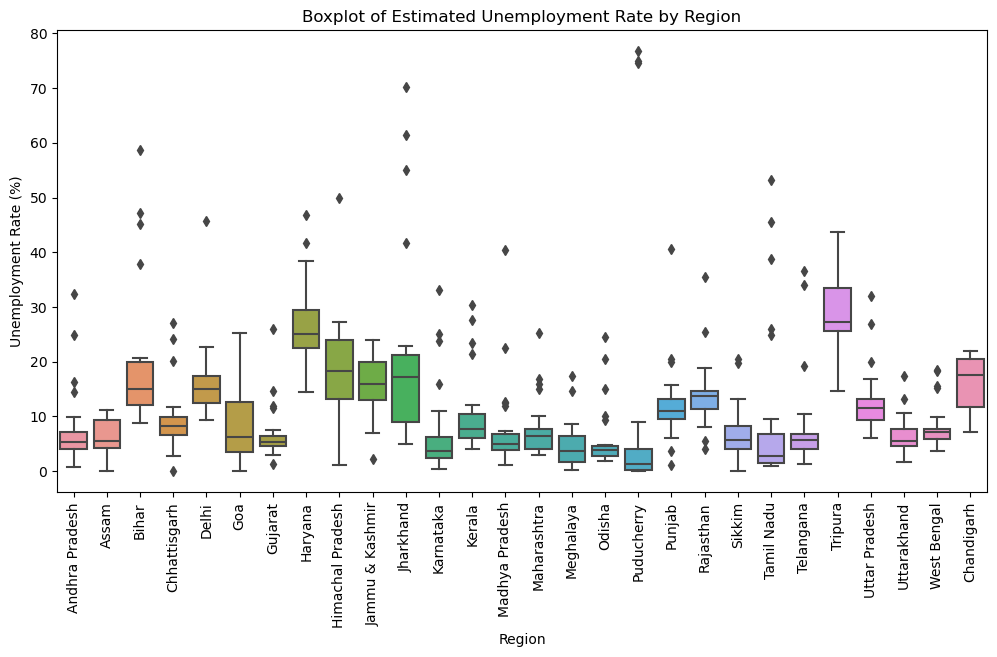

In [15]:
# Boxplot for Estimated Unemployment Rate by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=data)
plt.title('Boxplot of Estimated Unemployment Rate by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.show()

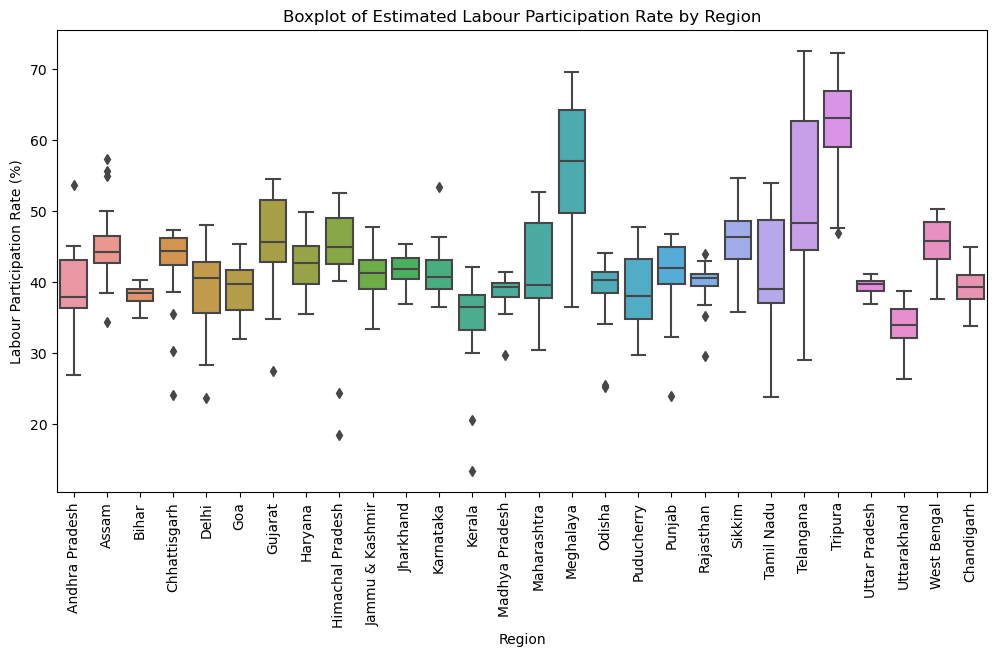

In [16]:
# Boxplot for Estimated Labour Participation Rate (%) by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Labour Participation Rate (%)', data=data)
plt.title('Boxplot of Estimated Labour Participation Rate by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Labour Participation Rate (%)')
plt.show()

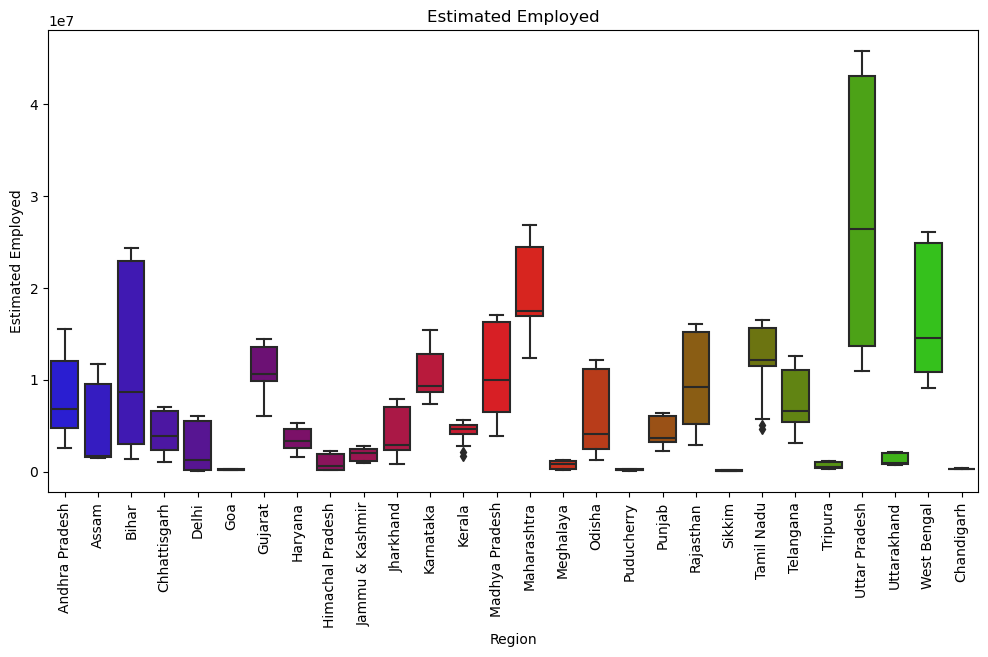

In [38]:
# Box Plot for Estimated Employed
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Employed', data=data,palette="brg")
plt.title("Estimated Employed")
plt.xlabel("Region")
plt.ylabel("Estimated Employed")
plt.xticks(rotation=90)
plt.show()

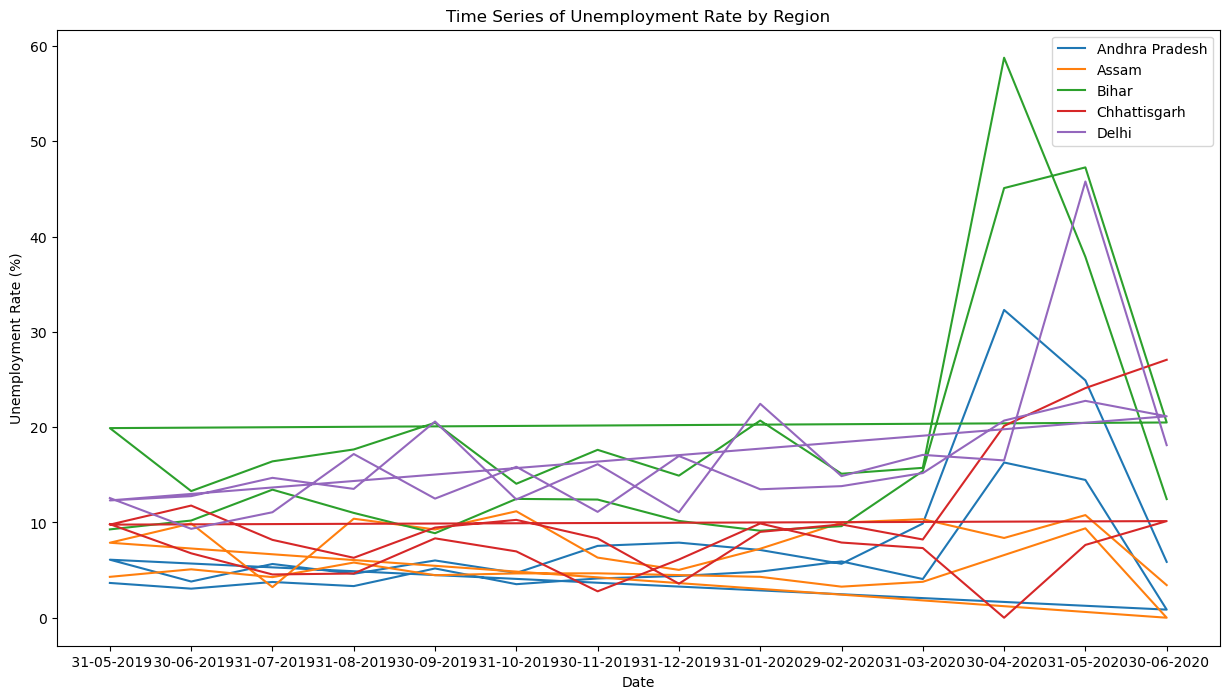

In [22]:
# Time Series Plot: Unemployment Rate by Region
regions = data['Region'].unique()
plt.figure(figsize=(15, 8))
for region in regions[:5]:  # Limiting to first 5 regions for clarity
    region_data = data[data['Region'] == region]
    plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], label=region)
plt.title('Time Series of Unemployment Rate by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

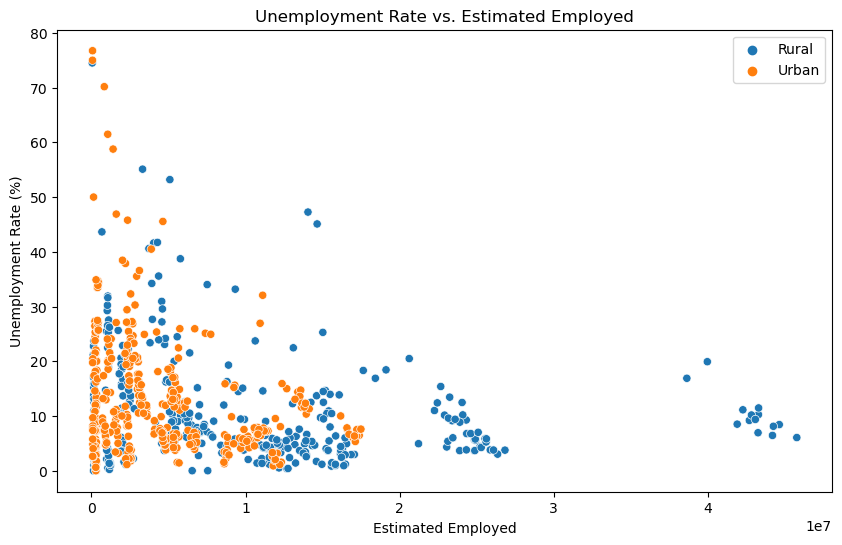

In [23]:
# Scatter Plot: Unemployment Rate vs. Estimated Employed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', hue='Area', data=data)
plt.title('Unemployment Rate vs. Estimated Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

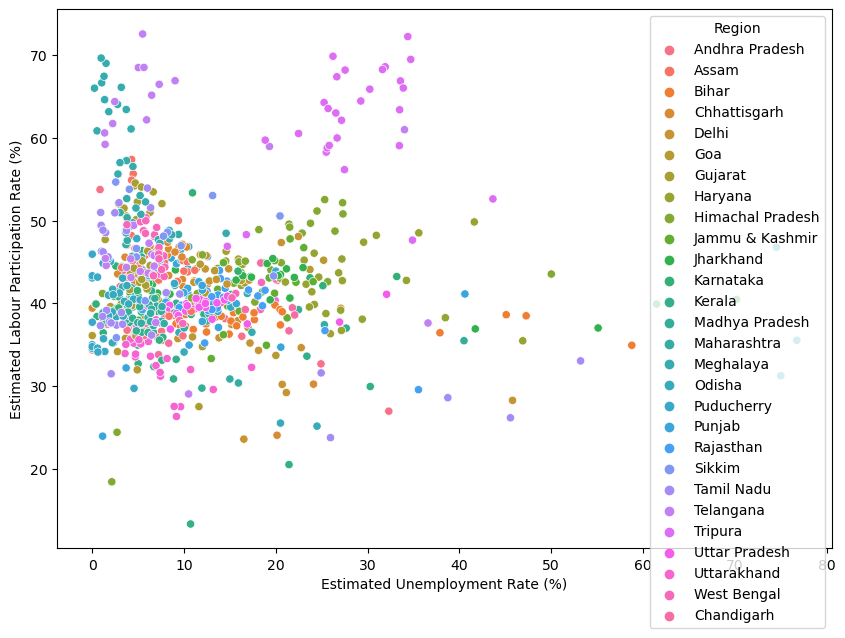

In [40]:
# Scatter Plot: Unemployment Rate vs. Labour participation vs. Region
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x="Estimated Unemployment Rate (%)", y="Estimated Labour Participation Rate (%)", hue="Region")
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no 

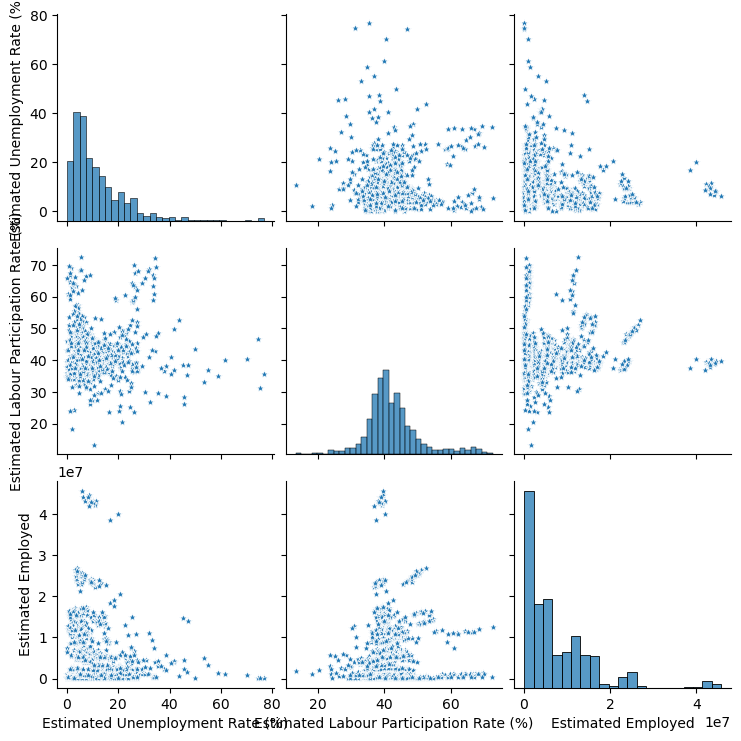

In [41]:
# Pair Plot
pair=data[["Estimated Unemployment Rate (%)", "Estimated Labour Participation Rate (%)","Estimated Employed"]]
sns.pairplot(pair,markers="*",palette="winter")
plt.show()

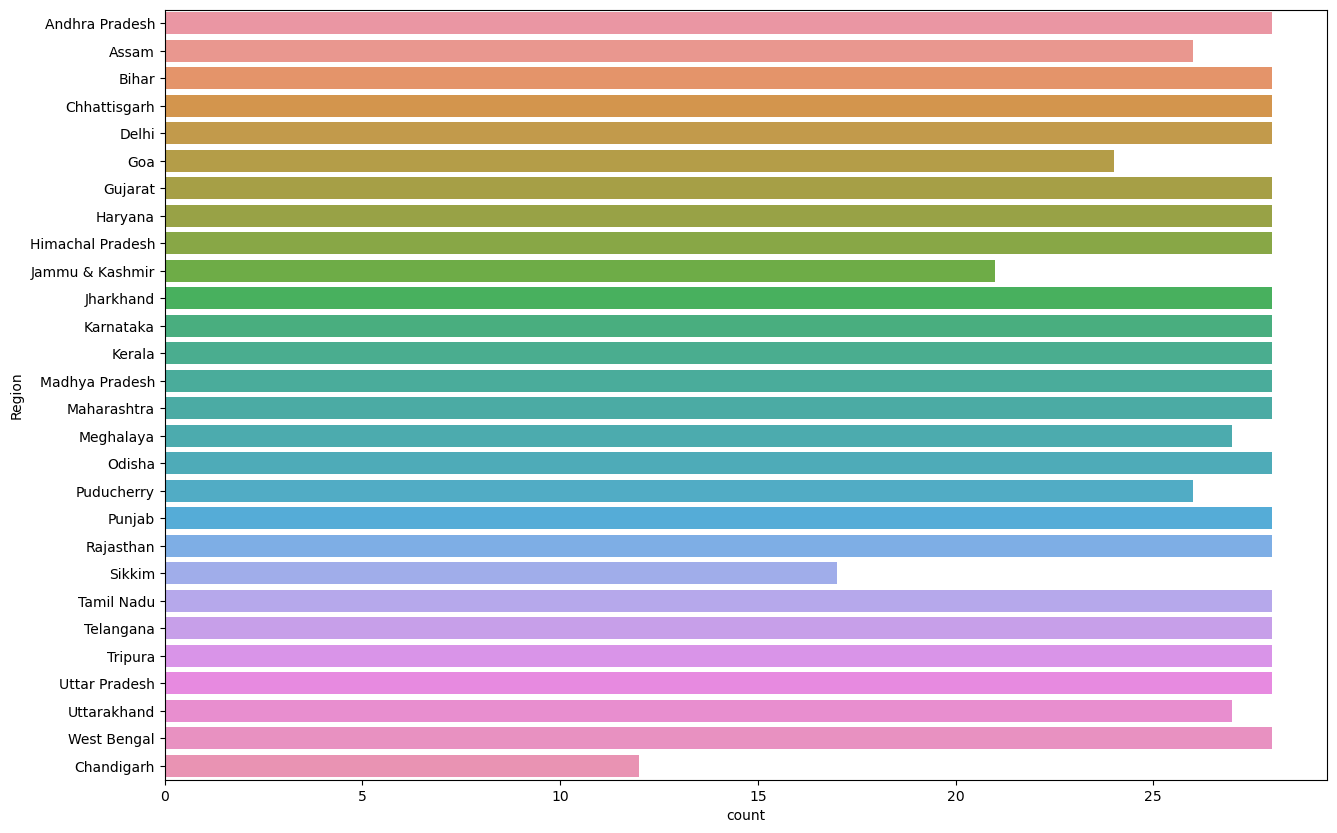

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(y="Region",data=data)
plt.show()

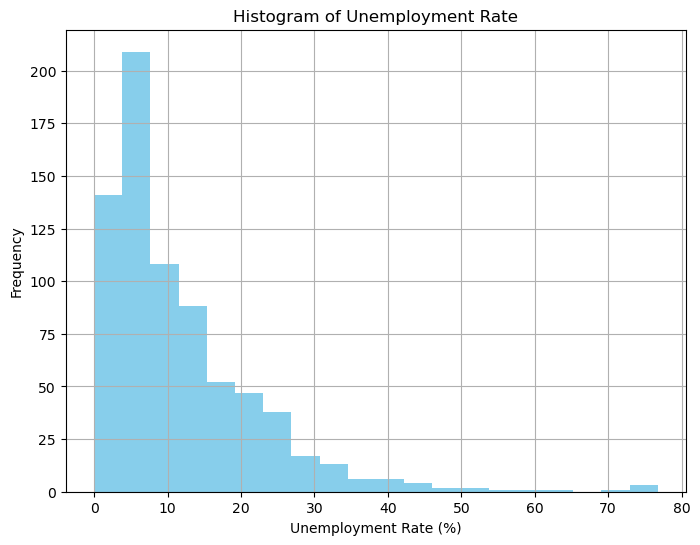

In [42]:
# Histogram for Estimated Labour Participation Rate
data['Estimated Unemployment Rate (%)'].hist(bins=20, color='skyblue', figsize=(8, 6))
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

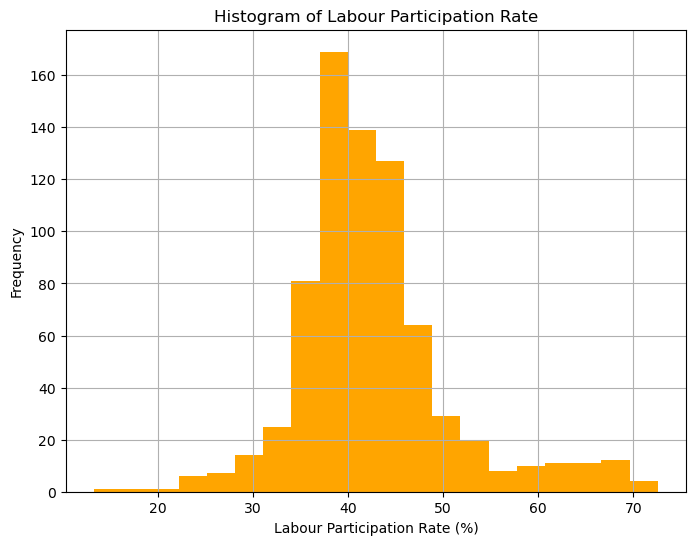

In [32]:
# Histogram for Estimated Labour Participation Rate
data['Estimated Labour Participation Rate (%)'].hist(bins=20, color='orange', figsize=(8, 6))
plt.title('Histogram of Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()

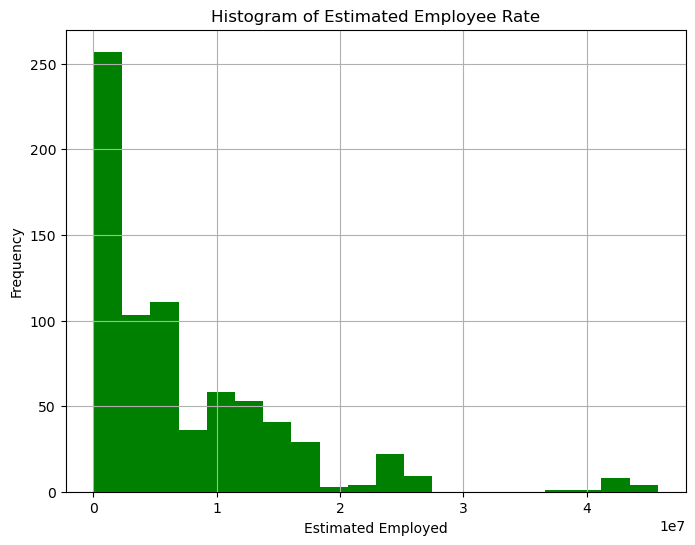

In [27]:
# Histogram for Estimated Employee Rate
data['Estimated Employed'].hist(bins=20, color='green', figsize=(8, 6))
plt.title('Histogram of Estimated Employee Rate')
plt.xlabel('Estimated Employed')
plt.ylabel('Frequency')
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


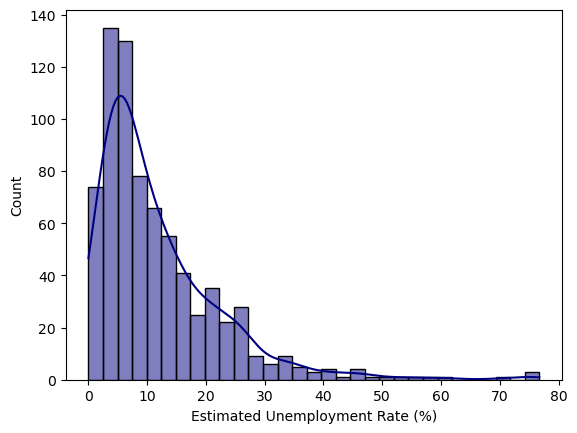

In [44]:
sns.histplot(data=data, x="Estimated Unemployment Rate (%)", kde=True,color="navy")
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


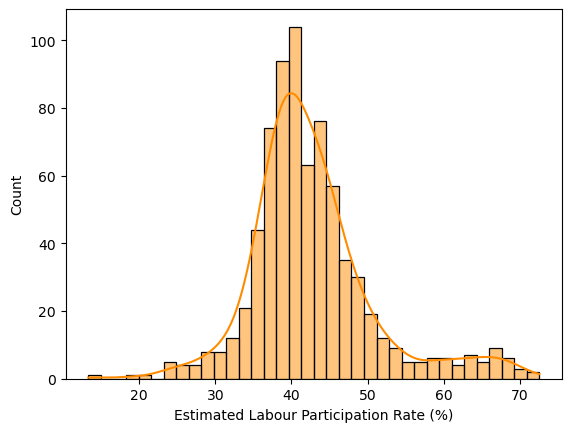

In [30]:
sns.histplot(data=data, x="Estimated Labour Participation Rate (%)", kde=True,color="darkorange")
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


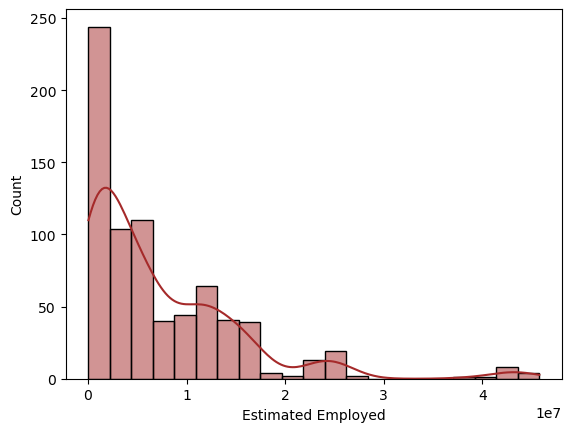

In [35]:
sns.histplot(data=data, x="Estimated Employed", kde=True,color="brown")
plt.show()

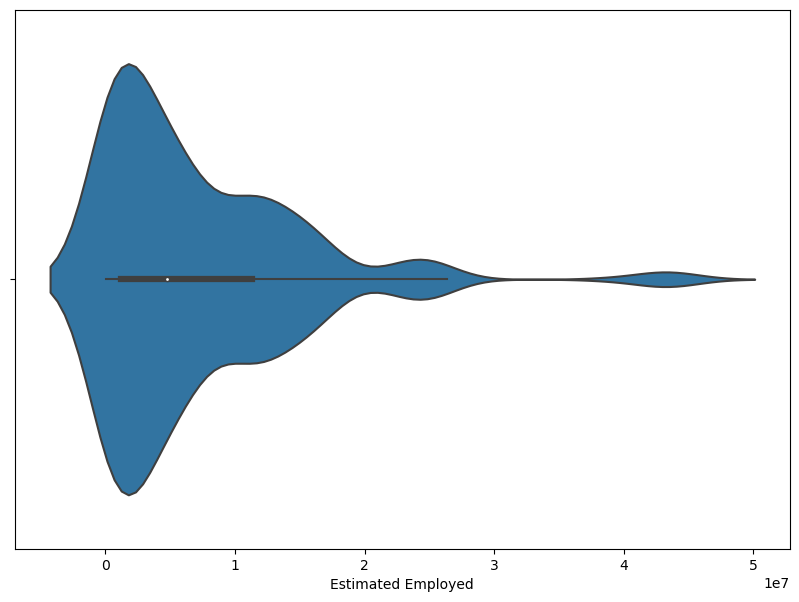

In [37]:
plt.figure(figsize=(10,7))
sns.violinplot(x=data["Estimated Employed"])
plt.show()

### Model Training

In [54]:
# Check for missing values
print(data[['Estimated Unemployment Rate (%)', 'Estimated Employed']].isnull().sum())
# Fill missing values with the mean
data['Estimated Unemployment Rate (%)'].fillna(data['Estimated Unemployment Rate (%)'].mean(), inplace=True)
data['Estimated Employed'].fillna(data['Estimated Employed'].mean(), inplace=True)

Estimated Unemployment Rate (%)    0
Estimated Employed                 0
dtype: int64


C:\Users\srira\AppData\Local\Temp\ipykernel_24300\195081243.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Estimated Unemployment Rate (%)'].fillna(data['Estimated Unemployment Rate (%)'].mean(), inplace=True)
C:\Users\srira\AppData\Local\Temp\ipykernel_24300\195081243.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

C:\Users\srira\AppData\Local\Temp\ipykernel_24300\3245931421.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='viridis', alpha=0.7)


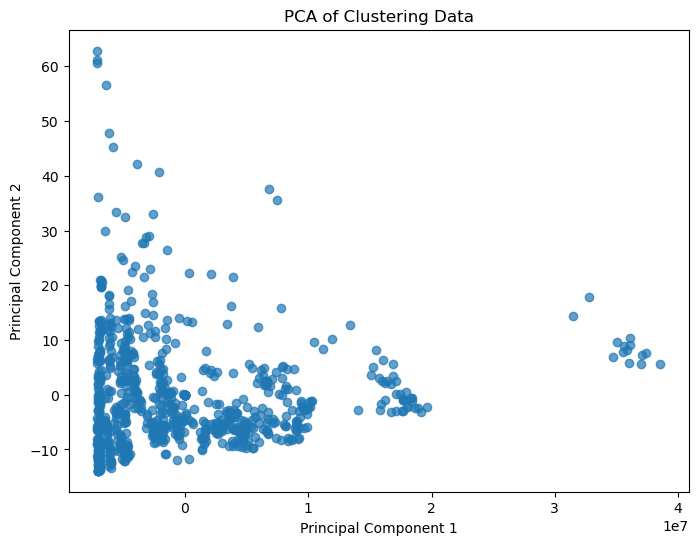

In [55]:
# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[['Estimated Unemployment Rate (%)', 'Estimated Employed']])
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='viridis', alpha=0.7)
plt.title('PCA of Clustering Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [57]:
# 3. Decision Tree
data = data.dropna()
X = data[['Estimated Labour Participation Rate (%)', 'Estimated Employed']]
y = (data['Estimated Unemployment Rate (%)'] > data['Estimated Unemployment Rate (%)'].mean()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [58]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.72
Recall: 0.62
Precision: 0.57
F1 Score: 0.60
